### Load Dataset

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프 그리기 
%matplotlib inline

# 그래프 마이너스 폰트 깨짐 설정
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
train = pd.read_csv("./bike-sharing-demand/train.csv", parse_dates=['datetime'])
train.shape

(10886, 12)

In [3]:
test = pd.read_csv("./bike-sharing-demand/test.csv", parse_dates=['datetime'])
test.shape

(6493, 9)

In [4]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 16)

In [5]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 13)

In [6]:
# 연속형 feature와 범주형 feature
# 범주형 feature의 type을 category로 변경해준다.
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [7]:
# 연속형 feature와 범주형 feature
# 연속형 feature = ['temp', 'humidity', 'windspeed', 'atemp']
# 범주형 feature의 type을 category로 변경해준다.
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [8]:
# feature 선택
feature_names =  ['season', 'holiday', 'workingday', 'weather', 'temp',
                   'atemp', 'humidity','year', 'hour', 'dayofweek']
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek']

In [9]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 10)


,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


In [10]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 10)


,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,2011,0,3
1,1,0,1,1,10.66,13.635,56,2011,1,3
2,1,0,1,1,10.66,13.635,56,2011,2,3
3,1,0,1,1,10.66,12.880,56,2011,3,3
4,1,0,1,1,10.66,12.880,56,2011,4,3


In [11]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [12]:
# RMSLE 계산
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):
    
    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값 빼주고 제곱 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균 내기
    mean_difference = difference.mean()
    
    # 루트 씌우기
    score = np.sqrt(mean_difference)
    
    return score

### 선형회귀 모델 Linear Regression Model
- 선형회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘
- 선형회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균오차제곱(MSE)를 최소화하는 파라미터 w와 b를 찾는다.
- 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다.

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형모델 객체 생성
lModel = LinearRegression()

# 모델 학습
y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

# 예측 후 정확도 평가
preds = lModel.predict(X_train)
print("RMSLE Value For Linear Regression: ",
     rmsle(np.exp(y_train_log), np.exp(preds), False))

RMSLE Value For Linear Regression:  0.9803697923313502


### 릿지 Regularization Model - Ridge
- 회귀를 위한 선형모델
- 가중치(w)의 모든 원소가 0에 가깝게 만들어 모든 피처가 주는 영향 최소화(기울기 작게 만듦)
- Regularization(규제)는 오버피팅(과대적합)이 되지 않도록 모델 강제로 제한한다는 의미
- max_iter(최대 반복 실행 횟수) = 3000으로 설정

In [19]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000], 'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200,
                                        300, 400, 800, 900, 1000]}
ridge_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_, #GridSearch를 통해 최적의 alpha값 찾기
                        ridge_params_,
                        scoring = rmsle_scorer,
                        cv=5)
y_train_log = np.log1p(y_train)
grid_ridge_m.fit(X_train, y_train_log)
preds = grid_ridge_m.predict(X_train)
print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train_log), np.exp(preds), False))

df = pd.DataFrame(grid_ridge_m.cv_results_)
df.head()

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9803697902780779


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015158,0.001715,0.007180,0.002918,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.003138,-0.906726,-1.029928,-1.016631,-0.982313,-0.987747,0.043461,1
1,0.010573,0.002148,0.005687,0.001720,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.003140,-0.906726,-1.029928,-1.016630,-0.982315,-0.987748,0.043461,2
2,0.010873,0.002056,0.005991,0.001781,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.003167,-0.906727,-1.029927,-1.016621,-0.982331,-0.987755,0.043461,3
3,0.011767,0.001933,0.010173,0.008908,2,3000,"{'alpha': 2, 'max_iter': 3000}",-1.003196,-0.906728,-1.029926,-1.016612,-0.982349,-0.987762,0.043461,4
4,0.011369,0.002864,0.005386,0.000798,3,3000,"{'alpha': 3, 'max_iter': 3000}",-1.003226,-0.906729,-1.029925,-1.016602,-0.982366,-0.987770,0.043460,5


In [22]:
df['alpha'] = df['params'].apply(lambda x: x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x: -x)
df[["alpha", "rmsle"]].head()

,alpha,rmsle
0,0.01,0.987747
1,0.10,0.987748
2,1.00,0.987755
3,2.00,0.987762
4,3.00,0.987770


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

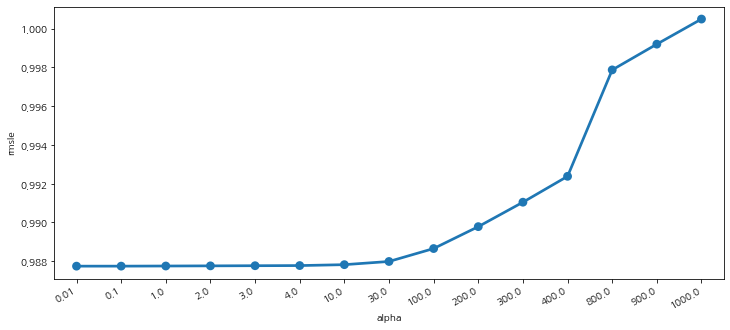

In [23]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x="alpha", y="rmsle", ax=ax)

### 라쏘 Regularization Model - Lasso
- 선형회귀의 Regularization(규제)를 적용하는 대안
- 계수를 0에 가깝게 만들고자하는 것을 L1규제라고 하며, 어떤 계수는 0이 되기도 하는데 이는 완전히 제외하는 피처가 생긴다는 의미이다.
- 피처 선택이 자동으로 이루어진다고 볼 수 있다.
- alpha값의 기본 값은 1.0이며, 과소 적합을 줄이기 위해 이 값을 줄여야 한다.
- 그리드 서치로 아래 라쏘모델을 실행했을 최적의 알파값은 0.00125
- max_iter = 3000으로 설정

In [24]:
lasso_m_ = Lasso()

alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params_ = {'max_iter':[3000], 'alpha':alpha}

grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_, scoring=rmsle_scorer, cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit(X_train, y_train_log)
preds = grid_lasso_m.predict(X_train)
print(grid_lasso_m.best_params_)
print("RMSLE Value For Lasso Regression: ", rmsle(np.exp(y_train_log), np.exp(preds), False))

df = pd.DataFrame(grid_lasso_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x: x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x: -x)
df[["alpha", "rmsle"]].head()

{'alpha': 0.00125, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9803727847762397


,alpha,rmsle
0,10.000000,1.397124
1,1.000000,1.071947
2,0.500000,1.062110
3,0.333333,1.060815
4,0.250000,1.061139


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

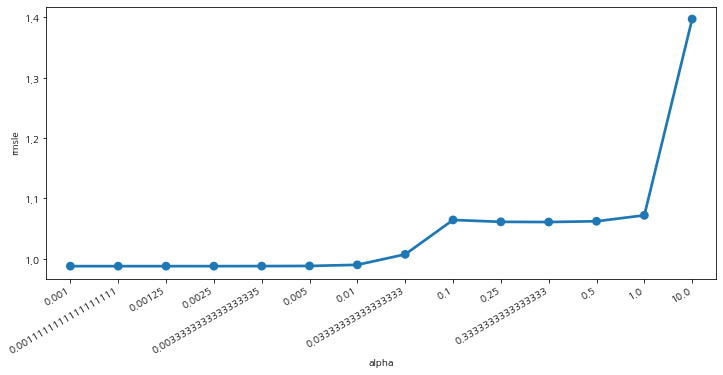

In [25]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x="alpha", y="rmsle", ax=ax)

### 앙상블모델 - 랜덤포레스트

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_lod = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print("RMSLE Value For Random Forest: ", score)

RMSLE Value For Random Forest:  0.10721760535598711


### 앙상블모델 - 그래디언트 부스트
- 여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법
- 회귀와 분류 모두 사용할 수 있음
- 랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리 만듦.
- 무작위성이 없고 강력한 사전 가지치기가 사용됨
- 1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠름
- learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어
- n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련세트에서 실수를 바로잡을 기회가 많아지지만 너무 크면 모델이 복잡해지고 오버피팅의 위험이 있다.
- max_depth(max_leaf_nodes) : 복잡도를 너무 높이지 않고 트리의 깊이가 5보다 깊어지지 않게 한다.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print("RMSLE Value For Gradient Boost: ", score)

<AxesSubplot:ylabel='Density'>

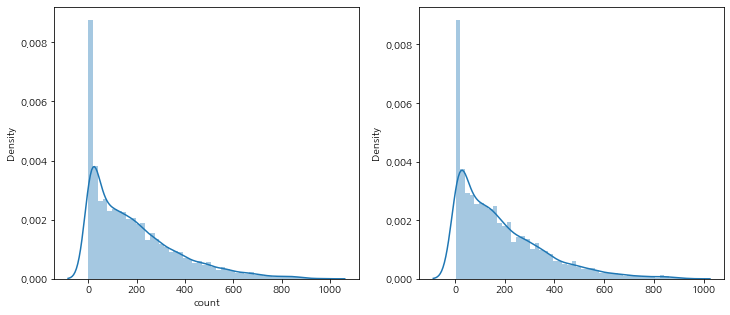

In [29]:
# RMSLE 값이 가장 낮게 나온 RandomForst로 예측
predsTest = rfModel.predict(X_test)
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train, ax=ax1, bins=50)
sns.distplot(np.exp(predsTest), ax=ax2, bins=50)

### Submit

In [30]:
submission = pd.read_csv("./bike-sharing-demand/sampleSubmission.csv")
submission

submission["count"] = np.exp(predsTest)

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.460754
1,2011-01-20 01:00:00,5.630355
2,2011-01-20 02:00:00,3.924903
3,2011-01-20 03:00:00,4.973602
4,2011-01-20 04:00:00,3.939099


In [34]:
submission.to_csv("./bike-sharing-demand/Score_{0:.5f}_submission.csv".format(score), index=False)

참고:
- [Kaggle Bike Sharing Demand Prediction - How To Get In Top 5 Of Competition]("https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/")